In [2]:
#using random forest to determine churners of the bank clients


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [4]:
try:
    df = pd.read_csv('BankChurners.csv')
    print("data loaded correctly")
except FileNotFoundError:
    print("file not found")
except Exception as e:
    print("wystapil blad podczas wczytywania pliku {e}")
df = df[df.columns[:-2]]

data loaded correctly


In [5]:
# df.info()
# df.describe()
df.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


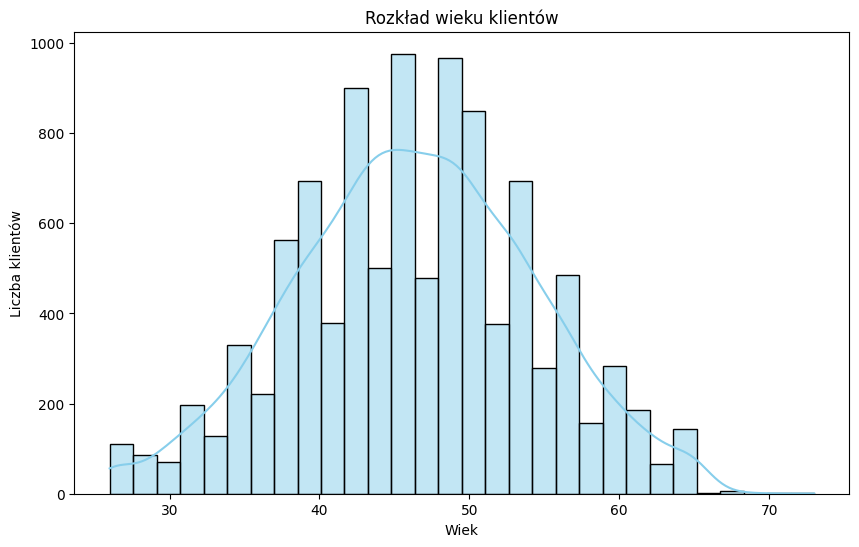

Średni wiek: 46.33
Mediana wieku: 46.00
Odchylenie standardowe wieku: 8.02
Minimalny wiek: 26
Maksymalny wiek: 73


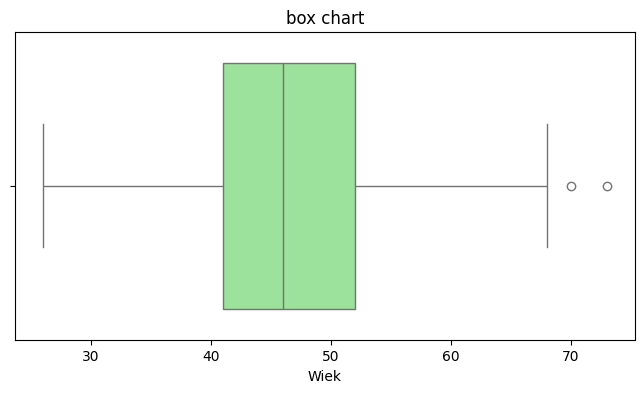

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład wieku klientów')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.show()

print(f"Średni wiek: {df['Customer_Age'].mean():.2f}")
print(f"Mediana wieku: {df['Customer_Age'].median():.2f}")
print(f"Odchylenie standardowe wieku: {df['Customer_Age'].std():.2f}")
print(f"Minimalny wiek: {df['Customer_Age'].min()}")
print(f"Maksymalny wiek: {df['Customer_Age'].max()}")

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Customer_Age'], color='lightgreen')
plt.title('box chart')
plt.xlabel('Wiek')
plt.show()

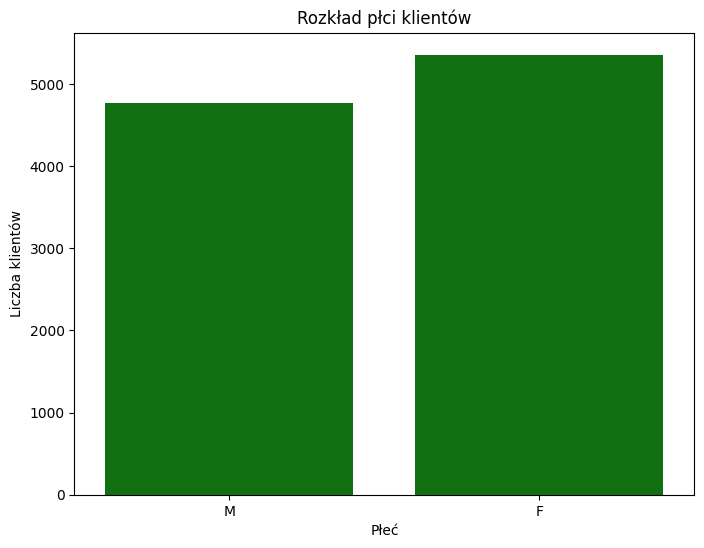

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, color='green')
plt.title('Rozkład płci klientów')
plt.xlabel('Płeć')
plt.ylabel('Liczba klientów')
plt.show()

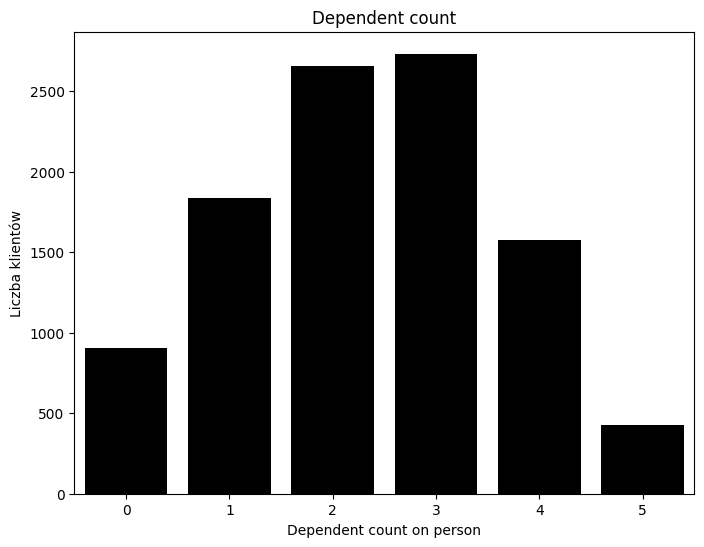

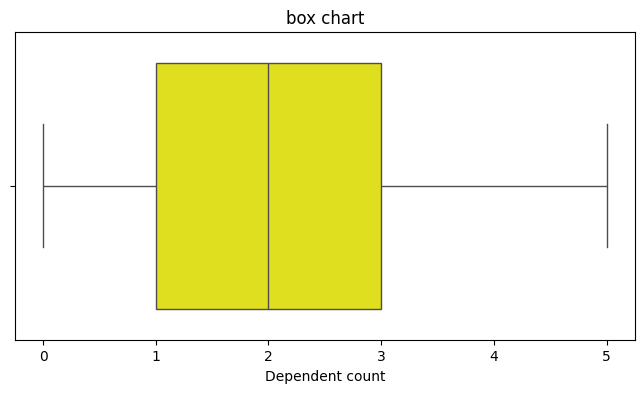

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependent_count', data=df, color='black')
plt.title('Dependent count')
plt.xlabel('Dependent count on person')
plt.ylabel('Liczba klientów')
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Dependent_count'], color='yellow')
plt.title('box chart')
plt.xlabel('Dependent count')
plt.show()

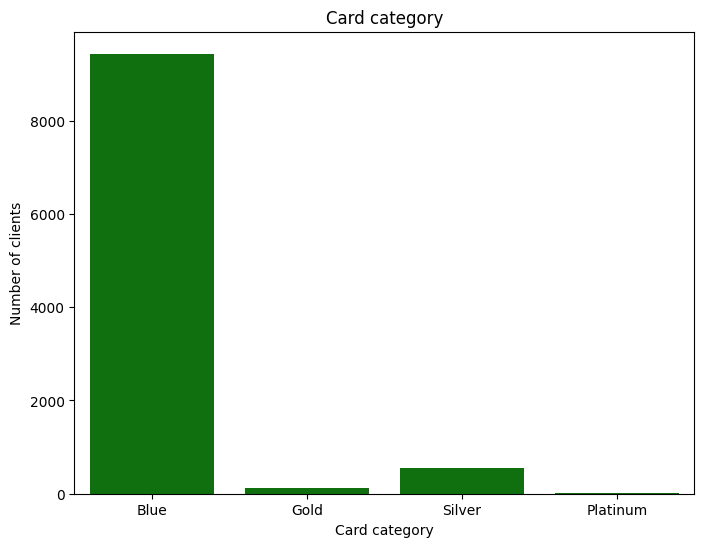

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Category', data=df, color='green')
plt.title('Card category')
plt.xlabel('Card category')
plt.ylabel('Number of clients')
plt.show()

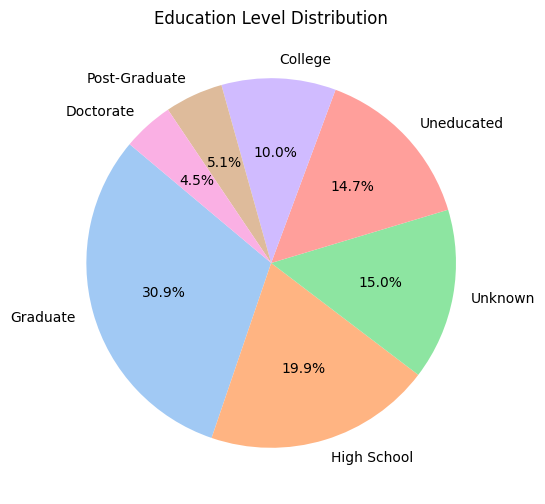

In [11]:
plt.figure(figsize=(8, 6))
education_counts = df['Education_Level'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Education Level Distribution')
plt.show()

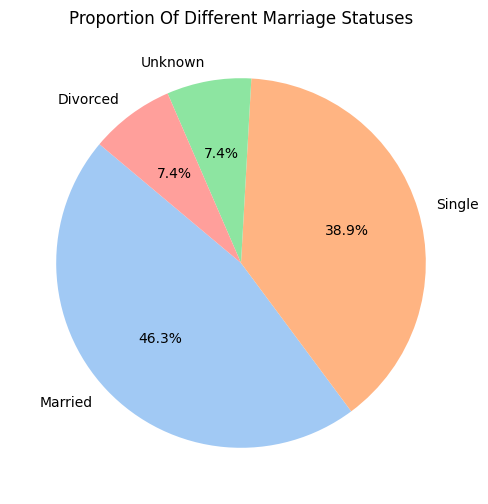

In [12]:

plt.figure(figsize=(8, 6))
marital_status_counts = df['Marital_Status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion Of Different Marriage Statuses')
plt.show()

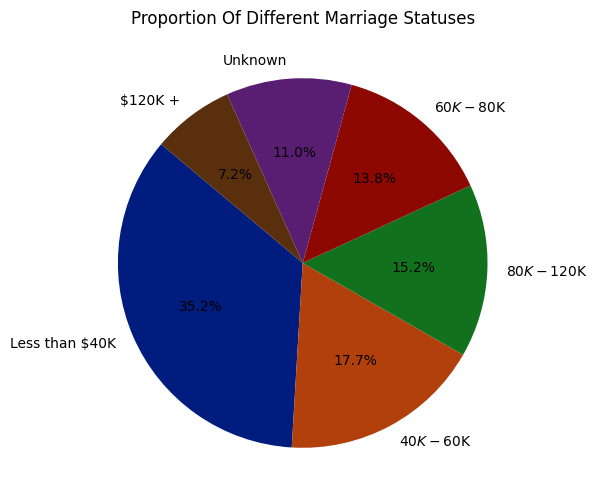

In [13]:
plt.figure(figsize=(8, 6))
different_income_category = df['Income_Category'].value_counts()
plt.pie(different_income_category, labels=different_income_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('dark'))
plt.title('Proportion Of Different Marriage Statuses')
plt.show()

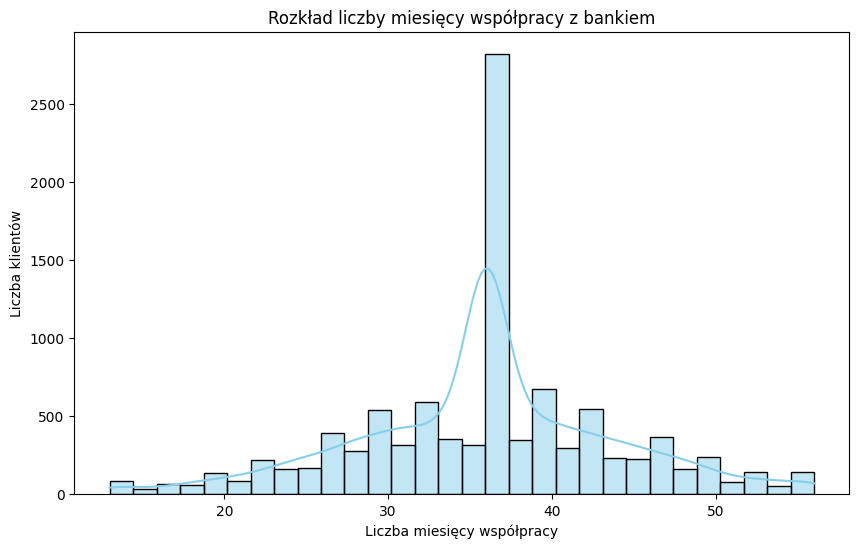

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64


In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Months_on_book'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład liczby miesięcy współpracy z bankiem')
plt.xlabel('Liczba miesięcy współpracy')
plt.ylabel('Liczba klientów')
plt.show()

print(df['Months_on_book'].describe())

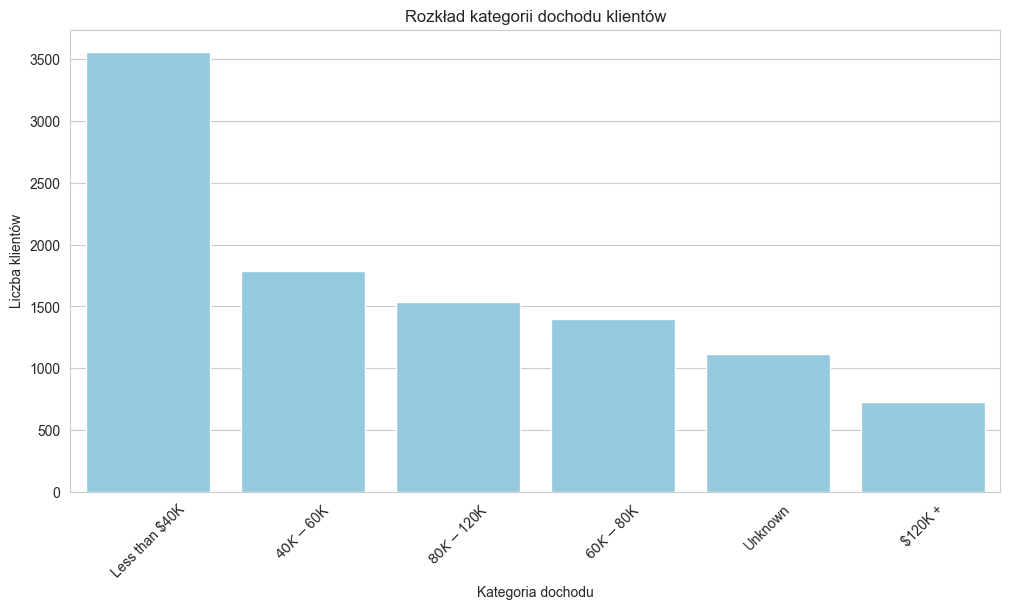

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


In [15]:

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Category', data=df, order=df['Income_Category'].value_counts().index, color='skyblue')
plt.title('Rozkład kategorii dochodu klientów')
plt.xlabel('Kategoria dochodu')
plt.ylabel('Liczba klientów')
plt.xticks(rotation=45) 
plt.show()

print(df['Income_Category'].value_counts())

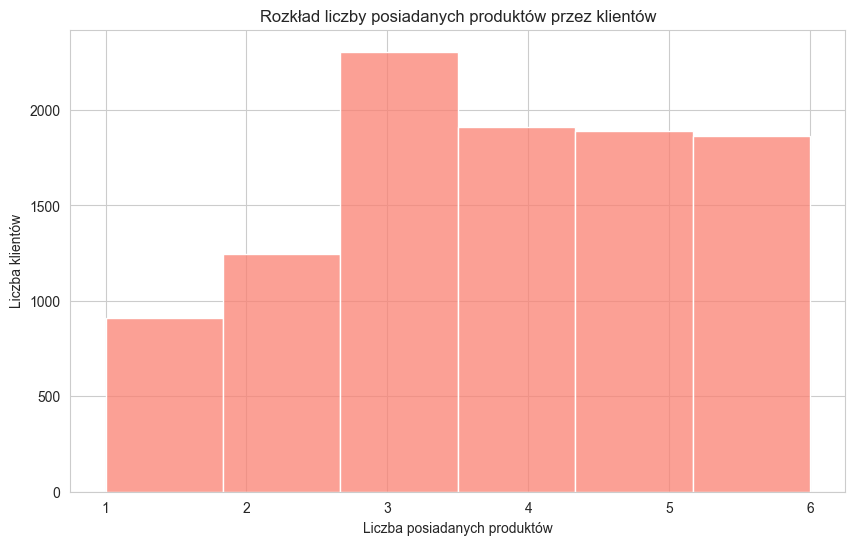

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64


In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Relationship_Count'], bins=df['Total_Relationship_Count'].nunique(), kde=False, color='salmon')
plt.title('Rozkład liczby posiadanych produktów przez klientów')
plt.xlabel('Liczba posiadanych produktów')
plt.ylabel('Liczba klientów')
plt.show()

print(df['Total_Relationship_Count'].describe())

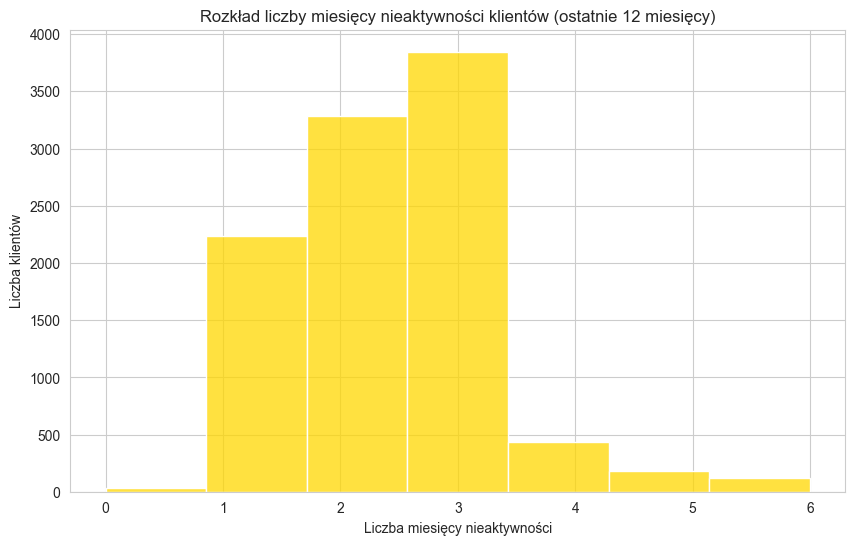

count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Months_Inactive_12_mon'], bins=df['Months_Inactive_12_mon'].nunique(), kde=False, color='gold')
plt.title('Rozkład liczby miesięcy nieaktywności klientów (ostatnie 12 miesięcy)')
plt.xlabel('Liczba miesięcy nieaktywności')
plt.ylabel('Liczba klientów')
plt.show()

print(df['Months_Inactive_12_mon'].describe())

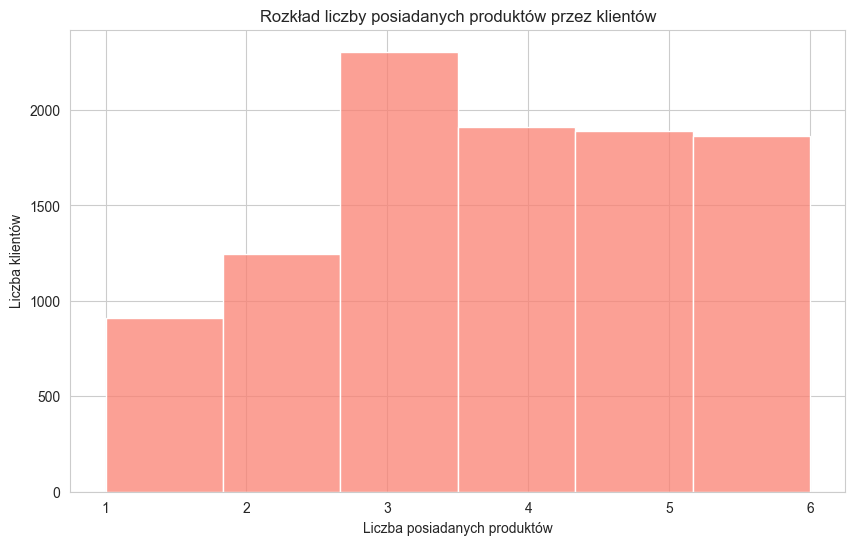

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64


In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Relationship_Count'], bins=df['Total_Relationship_Count'].nunique(), kde=False, color='salmon')
plt.title('Rozkład liczby posiadanych produktów przez klientów')
plt.xlabel('Liczba posiadanych produktów')
plt.ylabel('Liczba klientów')
plt.show()

print(df['Total_Relationship_Count'].describe())

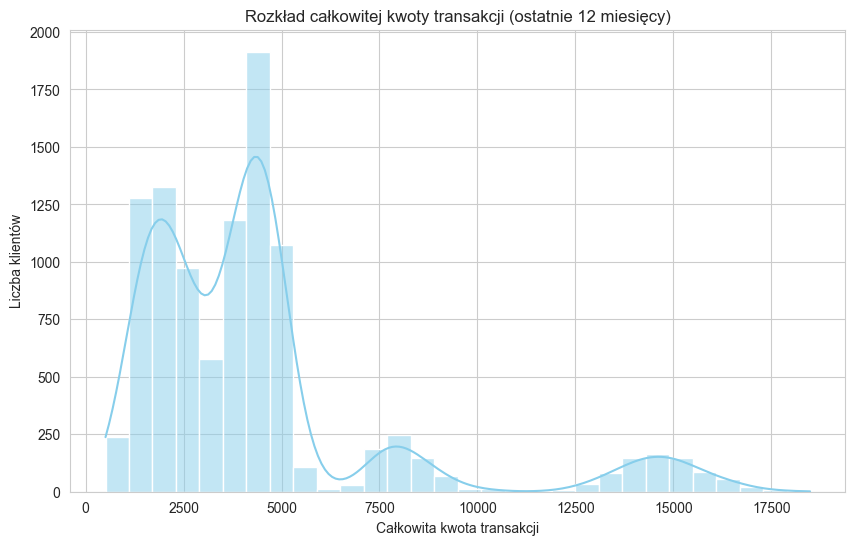

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64


C:\Users\ksawe\AppData\Local\Temp\ipykernel_30524\309780128.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, palette='viridis')


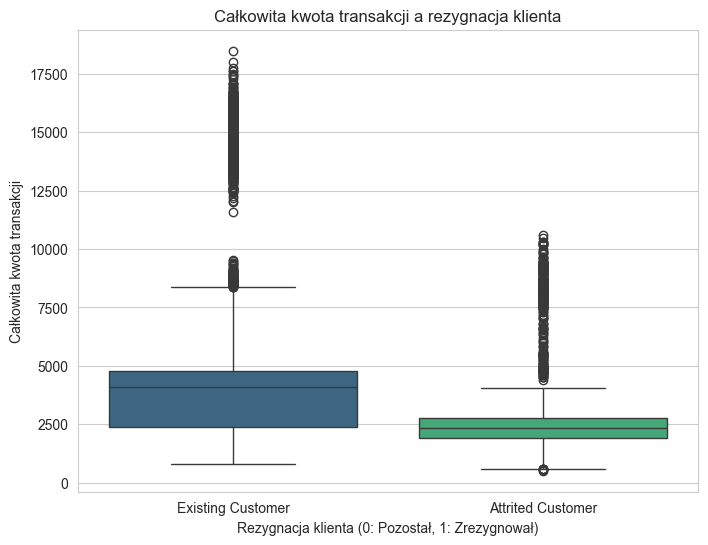

In [19]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Trans_Amt'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład całkowitej kwoty transakcji (ostatnie 12 miesięcy)')
plt.xlabel('Całkowita kwota transakcji')
plt.ylabel('Liczba klientów')
plt.show()

print(df['Total_Trans_Amt'].describe())

plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, palette='viridis')
plt.title('Całkowita kwota transakcji a rezygnacja klienta')
plt.xlabel('Rezygnacja klienta (0: Pozostał, 1: Zrezygnował)')
plt.ylabel('Całkowita kwota transakcji')
plt.show()

Data Preprocessing

In [20]:
missing_data = df.isnull().sum()
print(missing_data)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [21]:

categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Gender']

df = pd.get_dummies(df, columns=categorical_cols) #one hot encoding

print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age  Dependent_count  \
0  768805383  Existing Customer            45                3   
1  818770008  Existing Customer            49                5   
2  713982108  Existing Customer            51                3   
3  769911858  Existing Customer            40                4   
4  709106358  Existing Customer            40                3   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
0                      3       12691.0                  777  ...   
1                      2        8256.0  

In [22]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

print(df.head())

   CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0  768805383               0            45                3              39   
1  818770008               0            49                5              44   
2  713982108               0            51                3              36   
3  769911858               0            40                4              34   
4  709106358               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  Income_Catego

In [23]:
numerical_cols = [
    "Customer_Age",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols].head())  

   Customer_Age  Months_on_book  Total_Relationship_Count  \
0     -0.165406        0.384621                  0.763943   
1      0.333570        1.010715                  1.407306   
2      0.583058        0.008965                  0.120579   
3     -0.789126       -0.241473                 -0.522785   
4     -0.789126       -1.869317                  0.763943   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0               -1.327136               0.492404      0.446622   
1               -1.327136              -0.411616     -0.041367   
2               -1.327136              -2.219655     -0.573698   
3                1.641478              -1.315636     -0.585251   
4               -1.327136              -2.219655     -0.430877   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0            -0.473422         0.488971              2.623494   
1            -0.366667        -0.008486              3.563293   
2            -1.426858        -0.445658  

MODEL SELECTION

In [24]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9545903257650543
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.94      0.77      0.85       327

    accuracy                           0.95      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

AUC-ROC: 0.9876478878563213
